# Basic NN model

In [40]:
#imports 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import *
from keras import metrics
from sklearn import preprocessing
from keras.callbacks import History 

In [15]:
#load data
trainset = pd.read_csv('archive/sign_mnist_train.csv')
train_y = trainset['label']
trainset.drop('label', inplace=True, axis=1)
trainset = trainset.values.reshape(-1, 28,28, 1)

testset = pd.read_csv('archive/sign_mnist_test.csv')
test_y = testset['label']
testset.drop('label', inplace=True, axis=1)
testset = testset.values.reshape(-1, 28, 28, 1)

#encode labels
le = preprocessing.LabelEncoder()
le.fit(["A", "B", "C", "D", "E", "F", "G", "H", "I", "J", 
        "K", "L", "M", "N", "O", "P", "Q", "R", "S", "T", 
        "U", "V", "W", "X", "Y", "Z"])

trainlabel = le.inverse_transform(train_y)
testlabel = le.inverse_transform(test_y)

Text(0.5, 1.0, 'L')

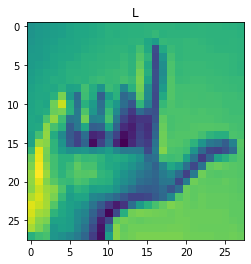

In [16]:
#visualize the datasets
i = 73
plt.imshow(trainset[i][:,:,0])
plt.title(trainlabel[i])

In [17]:
#construct basic model
model=Sequential([])

#layer1
model.add(Conv2D(64,(3,3),activation="relu",input_shape=(28,28,1)))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))

#layer 2
model.add(Conv2D(128,(3,3),activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))

model.add(Flatten())
model.add(Dense(256, activation="relu"))
model.add(Dense(26,activation="softmax"))

In [39]:
#compile and train
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.fit(trainset, train_y, epochs=1, batch_size= 32, validation_split=0.3)

Train on 19218 samples, validate on 8237 samples
Epoch 1/1
19218/19218 [==============================] - 59s 3ms/step - loss: 0.0267 - accuracy: 0.9929 - val_loss: 0.6855 - val_accuracy: 0.8943


TypeError: 'History' object is not subscriptable

In [32]:
#evaluate over all performance on the test set
model.evaluate(testset, test_y, batch_size = 32)

7172/7172 [==============================] - 4s 616us/step


[0.4743178153042544, 0.8934746384620667]

Predict from the model

In [33]:
classes = model.predict(testset)
predictions = np.argmax(classes, axis=1)
predictlabels = le.inverse_transform(predictions)

Text(0.5, 1.0, 'H   (T)')

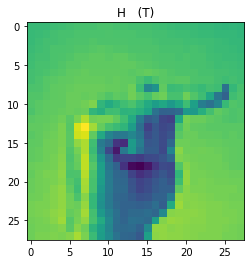

In [36]:
#visualize the datasets
i = 444
plt.imshow(testset[i][:,:,0])
plt.title(predictlabels[i]+'   ('+testlabel[i]+')')

Evaluate loss over epochs

In [41]:
history = History()
model.fit(trainset, train_y, epochs=10, batch_size=32, validation_split=0.3, callbacks=[history], verbose=0)

Train on 19218 samples, validate on 8237 samples
Epoch 1/10
19218/19218 [==============================] - 66s 3ms/step - loss: 0.0062 - accuracy: 0.9985 - val_loss: 0.0675 - val_accuracy: 0.9832
Epoch 2/10
19218/19218 [==============================] - 61s 3ms/step - loss: 0.0315 - accuracy: 0.9931 - val_loss: 0.9077 - val_accuracy: 0.8717
Epoch 3/10
19218/19218 [==============================] - 60s 3ms/step - loss: 0.0028 - accuracy: 0.9991 - val_loss: 0.0130 - val_accuracy: 0.9995
Epoch 4/10
19218/19218 [==============================] - 60s 3ms/step - loss: 8.3022e-06 - accuracy: 1.0000 - val_loss: 0.0134 - val_accuracy: 0.9995
Epoch 5/10
19218/19218 [==============================] - 60s 3ms/step - loss: 2.2683e-06 - accuracy: 1.0000 - val_loss: 0.0150 - val_accuracy: 0.9996
Epoch 6/10
19218/19218 [==============================] - 60s 3ms/step - loss: 1.7702e-06 - accuracy: 1.0000 - val_loss: 0.0165 - val_accuracy: 0.9996
Epoch 7/10
19218/19218 [==============================] -

TypeError: 'History' object is not subscriptable

In [44]:
print(history.history['loss'])

[0.006183814284762838, 0.031534590678560334, 0.0028152999429862545, 8.302232634689891e-06, 2.2683173625566222e-06, 1.7702126404585077e-06, 1.2311050415336582e-06, 7.842705885105595e-07, 6.250793316002976e-07, 4.630154635645269e-07]


Text(0.5, 0, 'Epoch')

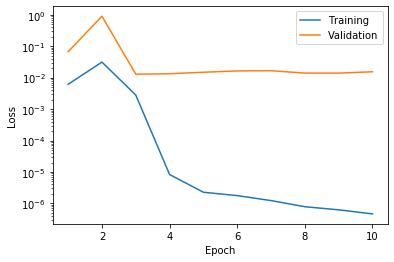

In [49]:
plt.plot(np.arange(1, 11), history.history['loss'], label = 'Training')
plt.plot(np.arange(1, 11), history.history['val_loss'], label = 'Validation')
plt.legend()
plt.yscale('log')
plt.ylabel('Loss')
plt.xlabel('Epoch')

In [ ]:
#learning rate;  how large of steps you take (in terms of gradient) to adjust the parameters
history = History()
train_loss = []
val_loss = []
for i in [0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30]:
    opt = keras.optimizers.Adam(learning_rate=i)
    model.compile(loss = 'sparse_categorical_crossentropy', optimizer = opt, metrics = ['accuracy'])
    model.fit(trainset, train_y, epochs=1, batch_size= 32, validation_split=0.3, callbacks=[history])
    train_loss.append(history.history['loss'][0])
    val_loss.append(history.history['val_loss'][0])

Train on 19218 samples, validate on 8237 samples
Epoch 1/1
19218/19218 [==============================] - 63s 3ms/step - loss: 0.0785 - accuracy: 0.9991 - val_loss: 0.0225 - val_accuracy: 0.9996
Train on 19218 samples, validate on 8237 samples
Epoch 1/1
19218/19218 [==============================] - 60s 3ms/step - loss: 0.0354 - accuracy: 0.9995 - val_loss: 0.0051 - val_accuracy: 0.9999
Train on 19218 samples, validate on 8237 samples
Epoch 1/1
19218/19218 [==============================] - 59s 3ms/step - loss: 6.2030e-12 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Train on 19218 samples, validate on 8237 samples
Epoch 1/1
17280/19218 [=========================>....] - ETA: 5s - loss: 0.0000e+00 - accuracy: 1.0000

In [ ]:
plt.plot([0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30], train_loss, label = 'Training')
plt.plot([0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30], val_loss, label = 'Validation')
plt.legend()
plt.yscale('log')
plt.ylabel('Loss')
plt.xlabel('Epoch')

In [ ]:
#beta1; exponential decay of first moment (how fast you adjust the "momentum" of the gradient descent)
history = History()
train_loss = []
val_loss = []
for i in [0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30]:
    opt = keras.optimizers.Adam(beta_1=1)
    model.compile(loss = 'sparse_categorical_crossentropy', optimizer = opt, metrics = ['accuracy'])
    model.fit(trainset, train_y, epochs=1, batch_size= 32, validation_split=0.3, callbacks=[history])
    train_loss.append(history.history['loss'][0])
    val_loss.append(history.history['val_loss'][0])

In [ ]:
#beta2; expoenetial decay of the second moment (how fast you adjust the "fricition" of the gradient descent)
history = History()
train_loss = []
val_loss = []
for i in [0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30]:
    opt = keras.optimizers.Adam(beta_2=i)
    model.compile(loss = 'sparse_categorical_crossentropy', optimizer = opt, metrics = ['accuracy'])
    model.fit(trainset, train_y, epochs=1, batch_size= 32, validation_split=0.3, callbacks=[history])
    train_loss.append(history.history['loss'][0])
    val_loss.append(history.history['val_loss'][0])